   ## USA REAL ESTATE SALES 2001 - 2020 DATASET CLEANING

**About the dataset**

* Link to the dataset: https://www.kaggle.com/datasets/reenapinto/real-estate-sales-2001-2020/data
* Lisence: U.S. Government Works
* Usability: 8.82

* The Office of Policy and Management maintains a listing of all real estate sales with a sales price of $2,000 or greater that occur between October 1 and September 30 of each year. For each sale record, the file includes town, property address, date of sale, property type (residential, apartment, commercial, industrial, or vacant land), sales price, and property assessment.

**Columns description**

* Serial Number: Regestration number of the transaction.
* List Year: The year when the transation was listed in the system.
* Date Recorded: Date of the transaction including Day, Month and Year
* Town: Town of the property in the recorded transaction.
* Adress: Street name and property number.
* Assessed Value: The value of the property as determined by public tax assessor for the purpose of taxation.
* Sale Amount: Actual amount paid for the sold property.
* Sales Ratio: Relationship between assessed value and sale amount.
* Property Type: Commertial, Residentai, land etc.
* Residential Type: family or condominium.
* OPM remarks: Remarks of US Office of Personnel Management 

**Mind Talk**

* While cleaning the dataset, i noticed some properties were assessed or sold for very low amounts down to zero, which made the corresponding sales ratio gets down to zero or become very high. This caused the mean for sales ratio column to be above 10, which is an unrealestic value. to solve that issue we can simply look for outliers and then removing them, which is an easy and a simple solution. but i decided to go further by trying to cure some of these values before removing the outliers that will remain.

* Dataset dimensions when i removed all outliers is (785168, 15).
* Dataset dimensions when i did some curing first before outliers removal is (871798, 17)

**Importing Librarries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install nbformat==5.2.0

  Obtaining dependency information for nbformat==5.2.0 from https://files.pythonhosted.org/packages/d0/53/95205a26fa0e13d110e343137292adf828b3cd07c3498a5b650d4c0b9be7/nbformat-5.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/74.6 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/74.6 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/74.6 kB ? eta -:--:--
   --------------------- ------------------ 41.0/74.6 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 74.6/74.6 kB 459.9 kB/s eta 0:00:00
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.1.1
    Uninstalling nbformat-5.1.1:
      Successfully uninstalled nbformat-5.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires nbformat==5.9.2, but you have nbformat 5.2.0 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.


**Importing, Inspecting & Cleaning the dataset**

In [2]:
# importing the csv file to a dataframe df and printing the top 5 rows.

df=pd.read_csv(r"C:\Users\Ramez-PC\Downloads\1- datasets\Realestate Records\US_real_Estate_Sales.csv")
df.head()

C:\Users\Ramez-PC\AppData\Local\Temp\ipykernel_2160\582844275.py:3: DtypeWarning: Columns (9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Ramez-PC\Downloads\1- datasets\Realestate Records\US_real_Estate_Sales.csv")


,Unnamed: 0,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,1,20002,2020,2020-02-10 00:00:00,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,2,200212,2020,2021-09-03 00:00:00,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,4,200377,2020,2021-02-07 00:00:00,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [3]:
# Dataframe count of coulmns and rows

df.shape

(997213, 15)

In [4]:
# Inspecting for duplicates

df.duplicated().sum()

0

In [5]:
# Inspecting Nulls.
# I will remove the two rows without date.
# I will not remove or fill address nulls as it is not as valuble as town column.

df.isnull().sum()

Unnamed: 0               0
Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847359
OPM remarks         987279
Location            799516
dtype: int64

In [6]:
# dropping the date column nulls

df.dropna(subset=["Date Recorded"],axis=0, inplace =True)
df.shape  

(997211, 15)

In [7]:
# changing the data type for columns year and date

df['List Year']=df['List Year'].astype(str)
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
df.dtypes

Unnamed: 0                   int64
Serial Number                int64
List Year                   object
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value               int64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
dtype: object

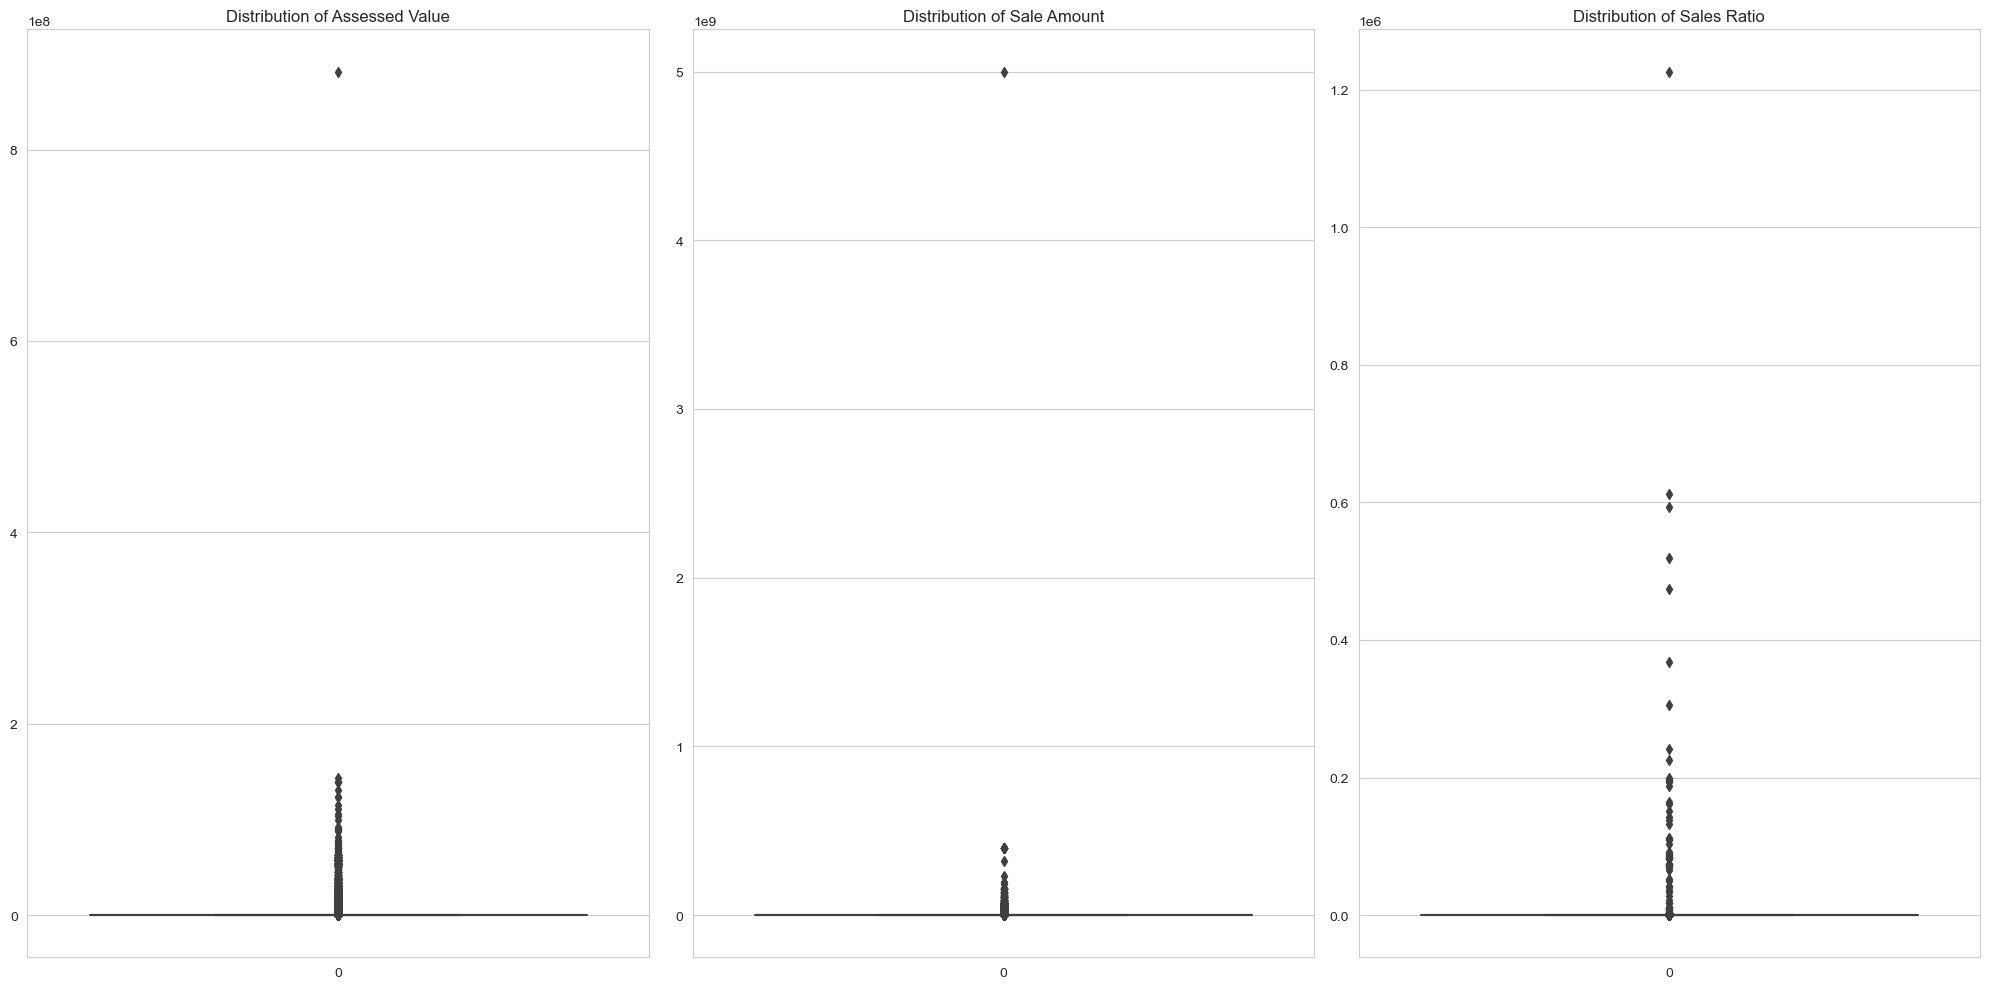

In [8]:
# Creating boxplots for columns with numerical values

# Set style for all graphs
sns.set_style("whitegrid")

# Create a grid of subplots
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# Plot distributions of Assessed Value, Sale Amount and Sales Ratio,
for ax, column in zip(axs, ['Assessed Value', 'Sale Amount', 'Sales Ratio']):
    
    data = df[column]
    
    # Creating the boxplot
    sns.boxplot(data=data, ax=ax)
    
    # Set the title
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

See how the quartiles and median of the boxplots can't be seen as the data is widely distributed and there are many outliers.

In [9]:
# A very wide gap between Mean and Median.

print('Sales Ratio Mean is:',df['Sales Ratio'].mean())
print('Sales Ratio Median is',df['Sales Ratio'].median())

Sales Ratio Mean is: 10.44639458285245
Sales Ratio Median is 0.6246


**method 1: Fixing some outliers**

1- I will remove the rows that have both Assessed value and Sale amount at zero.

In [10]:
# making a new column by summing both columns assessed and sale values
df['temp']=df['Assessed Value']+df['Sale Amount']

df = df[df.temp > 0] # Removing the rows with values 0

del df['temp'] # deleting the temporary column

df.shape

(996926, 15)

2- Replacing the outliers of Sales ratio with the median value

In [11]:
# Defining the variables needed to find and change outliers .

Q1_SR = df['Sales Ratio'].quantile(0.25) # first quartile
Q2_SR = df['Sales Ratio'].quantile(0.50) # second quartile 'median'
Q3_SR = df['Sales Ratio'].quantile(0.75) # third quartile
IQR_SR = Q3_SR - Q1_SR                   # interquartile range
upper_SR = Q3_SR + (1.5 * IQR_SR)        # upper limit of the data 'max'
lower_SR = Q1_SR - (1.5 * IQR_SR)        # lower limit of data 'min'
upper_SR

1.233175407

In [12]:
# How many sales ratio outliers we have?

print('Outliers count for sales ratio is : ', 
      ( (df['Sales Ratio'] < (Q1_SR - 1.5*IQR_SR)).sum()) 
      + (df['Sales Ratio'] > (Q3_SR + 1.5*IQR_SR)).sum())

Outliers count for sales ratio is :  99861


In [13]:
# Changing values higher than max with more reasonable value 'median'.
df["Sales Ratio"] = np.where(df["Sales Ratio"] > upper_SR,Q2_SR,df["Sales Ratio"])

# Changing values below min with median.
df['Sales Ratio'] = np.where(df['Sales Ratio'] < lower_SR, Q2_SR, df['Sales Ratio'])

In [14]:
# Now outliers are zero

print('Outliers count for sales ratio is : ', 
      ( (df['Sales Ratio'] < (Q1_SR - 1.5*IQR_SR)).sum()) 
      + (df['Sales Ratio'] > (Q3_SR + 1.5*IQR_SR)).sum())

Outliers count for sales ratio is :  0


In [15]:
# Slight gap between median and mode after the cleaning. 

print('New Sales Ratio Mean is:',df['Sales Ratio'].mean())
print('Sales Ratio Median is:',df['Sales Ratio'].median())

New Sales Ratio Mean is: 0.6167223537580597
Sales Ratio Median is: 0.6246822295000001


In [16]:
# Creating two temporary columns of Sale amount and Assessed value.
# In here, sales ratio values were cleaned so using it will clean some outliers.

df['Sale_Amount_Temp']=df['Assessed Value']/df['Sales Ratio']
df['Assessed_Value_Temp']=df['Sale Amount']*df['Sales Ratio']
df.shape

(996926, 17)

3- Replacing some Assessed and sale values before removing outliers.

In [17]:
"""
Replacing the Sale and Assessed values that are less than 10k with the corresponding value from the temporary
columns, that will fix some values as it is not logical to sell a property with such low price.
"""

df.loc[df['Sale Amount'] <= 10000 , 'Sale Amount'] = df.loc[df['Sale Amount'] <= 10000 , 'Sale_Amount_Temp']
df.loc[df['Assessed Value'] <= 10000 , 'Assessed Value'] = df.loc[df['Assessed Value'] <= 10000 , 'Assessed_Value_Temp']
df.shape

(996926, 17)

In [18]:
# Removing the rows That still has 0 values.

df = df[df.Sale_Amount_Temp > 0]
df = df[df.Assessed_Value_Temp > 0]
df.shape

(988757, 17)

In [21]:
# Defining the variables needed to find and change outliers.

Q1_SA = df['Sale Amount'].quantile(0.25) # first quartile
Q3_SA = df['Sale Amount'].quantile(0.75) # third quartile
IQR_SA = Q3_SA - Q1_SA                   # interquartile range
upper_SA = Q3_SA + (1.5 * IQR_SA)        # max
lower_SA = Q1_SA - (1.5 * IQR_SA)        # min

# finding outliers count.
print('Outliers count for Sale Amount is : ',
      ( (df['Sale Amount'] < (Q1_SA - 1.5 * IQR_SA)).sum()) 
      + (df['Sale Amount'] > (Q3_SA + 1.5 * IQR_SA)).sum())
upper_SA

Outliers count for Sale Amount is :  82215


701750.0

In [20]:
# Replacing the values higher than max with its corresponding values from the temporary column.
# After that i must run the above code again as some outliers were fixed.

df.loc[df['Sale Amount'] > upper_SA , 'Sale Amount'] = df.loc[df['Sale Amount'] > upper_SA , 'Sale_Amount_Temp']

In [22]:
# Removing outliers.

df=df[(df['Sale Amount'] > (Q1_SA - 1.5 * IQR_SA)) & (df['Sale Amount'] < (Q3_SA + 1.5 * IQR_SA))]
df.shape

(906542, 17)

In [25]:
# Defining the variables needed to find and change outliers.

Q1_AV = df['Assessed Value'].quantile(0.25)
Q3_AV = df['Assessed Value'].quantile(0.75)
IQR_AV = Q3_AV - Q1_AV
upper_AV = Q3_AV + (1.5 * IQR_AV)
lower_AV = Q1_AV - (1.5 * IQR_AV)
print('Outliers count for Assessed Value is : ', 
      ( (df['Assessed Value'] < (Q1_AV - 1.5 * IQR_AV)).sum()) 
      + (df['Assessed Value'] > (Q3_AV + 1.5 * IQR_AV)).sum())
upper_AV

Outliers count for Assessed Value is :  34744


359295.0

In [24]:
# Replacing the values higher than max with its corresponding values from the temporary column.
# After that i must run the above code again as some outliers were fixed.

df.loc[df['Assessed Value'] > upper_AV , 'Assessed Value'] = df.loc[df['Assessed Value'] > upper_AV , 'Assessed_Value_Temp']

In [26]:
# removing remaining outliers.

df=df[(df['Assessed Value'] > (Q1_AV - 1.5 * IQR_AV)) & (df['Assessed Value'] < (Q3_AV + 1.5 * IQR_AV))]
df.shape

(871798, 17)

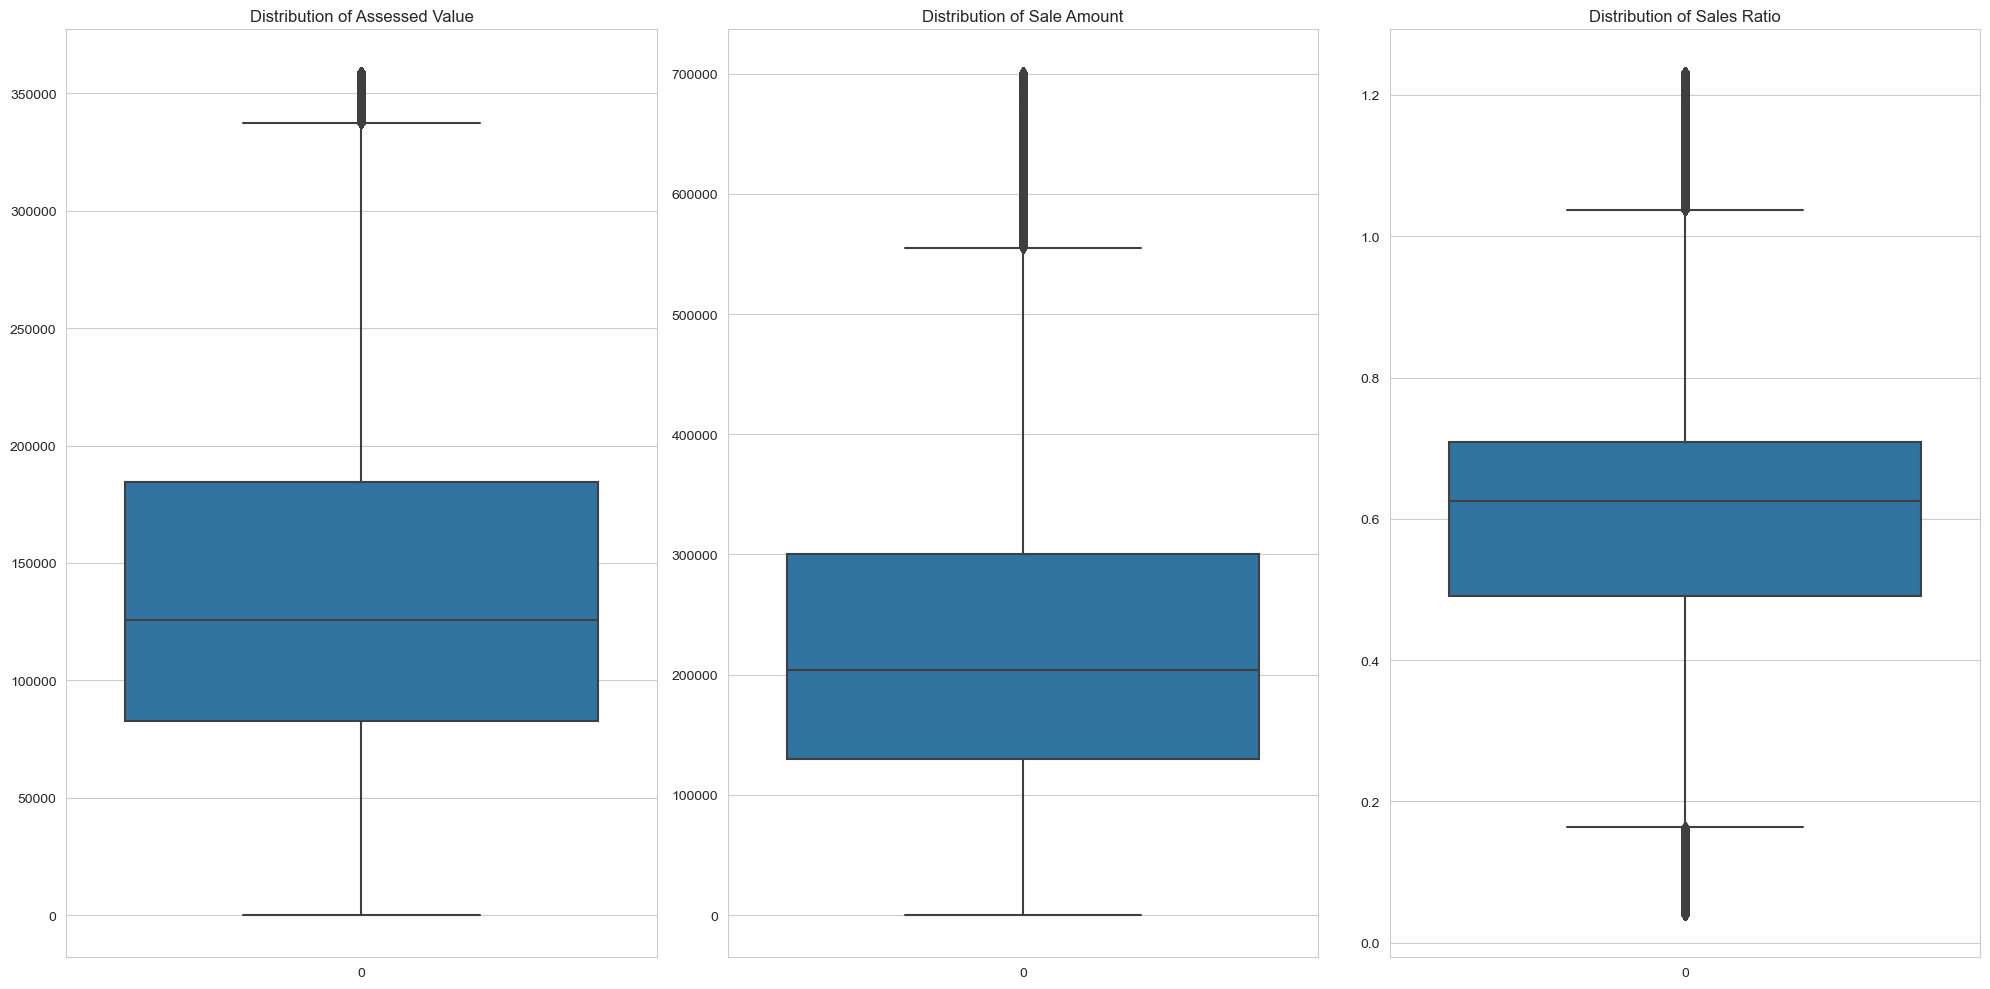

In [27]:
# Running the boxplot again to see the result.

# Set style for all graphs
sns.set_style("whitegrid")

# Create a grid of subplots
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# Plot distributions of Assessed and sale values and Sales ratio
for ax, column in zip(axs, ['Assessed Value', 'Sale Amount', 'Sales Ratio']):

    data = df[column]
    
    # Create the boxplot
    sns.boxplot(data=data, ax=ax)
    
    # Set the title
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [28]:
# Removing the temporary columns.

del df['Sale_Amount_Temp']
del df['Assessed_Value_Temp']

df.shape

(871798, 15)

In [29]:
df.describe()

,Unnamed: 0,Serial Number,Assessed Value,Sale Amount,Sales Ratio
count,871798.000000,8.717980e+05,871798.000000,871798.000000,871798.000000
mean,495181.099721,4.338542e+05,138731.698188,226111.646826,0.612920
std,288579.980038,6.753815e+06,76637.147203,132005.488710,0.196663
min,0.000000,8.100000e+01,0.624682,1.600814,0.039019
25%,242491.250000,3.035400e+04,82460.000000,130000.000000,0.490840
50%,491484.500000,7.016600e+04,125540.000000,204000.000000,0.624682
75%,747622.750000,1.509080e+05,184380.000000,300000.000000,0.709279
max,997211.000000,2.000500e+09,359290.000000,701749.999583,1.233167


In [30]:
# Saving the result dataframe into a new CSV file for furtur use.

df.to_csv('Real_estate_cleaned.csv')

**method 2: Removing all outliers**

In [31]:
df2=pd.read_csv(r"C:\Users\Ramez-PC\Downloads\1- datasets\Realestate Records\US_real_Estate_Sales.csv")
df2.shape 

C:\Users\Ramez-PC\AppData\Local\Temp\ipykernel_2160\403034144.py:1: DtypeWarning: Columns (9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv(r"C:\Users\Ramez-PC\Downloads\1- datasets\Realestate Records\US_real_Estate_Sales.csv")


(997213, 15)

In [32]:
df2.dropna(subset=["Date Recorded"],axis=0, inplace =True)
df2.shape  

(997211, 15)

In [33]:
df2['List Year']=df2['List Year'].astype(str)
df2['Date Recorded'] = pd.to_datetime(df2['Date Recorded'])
df2.dtypes

Unnamed: 0                   int64
Serial Number                int64
List Year                   object
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value               int64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
dtype: object

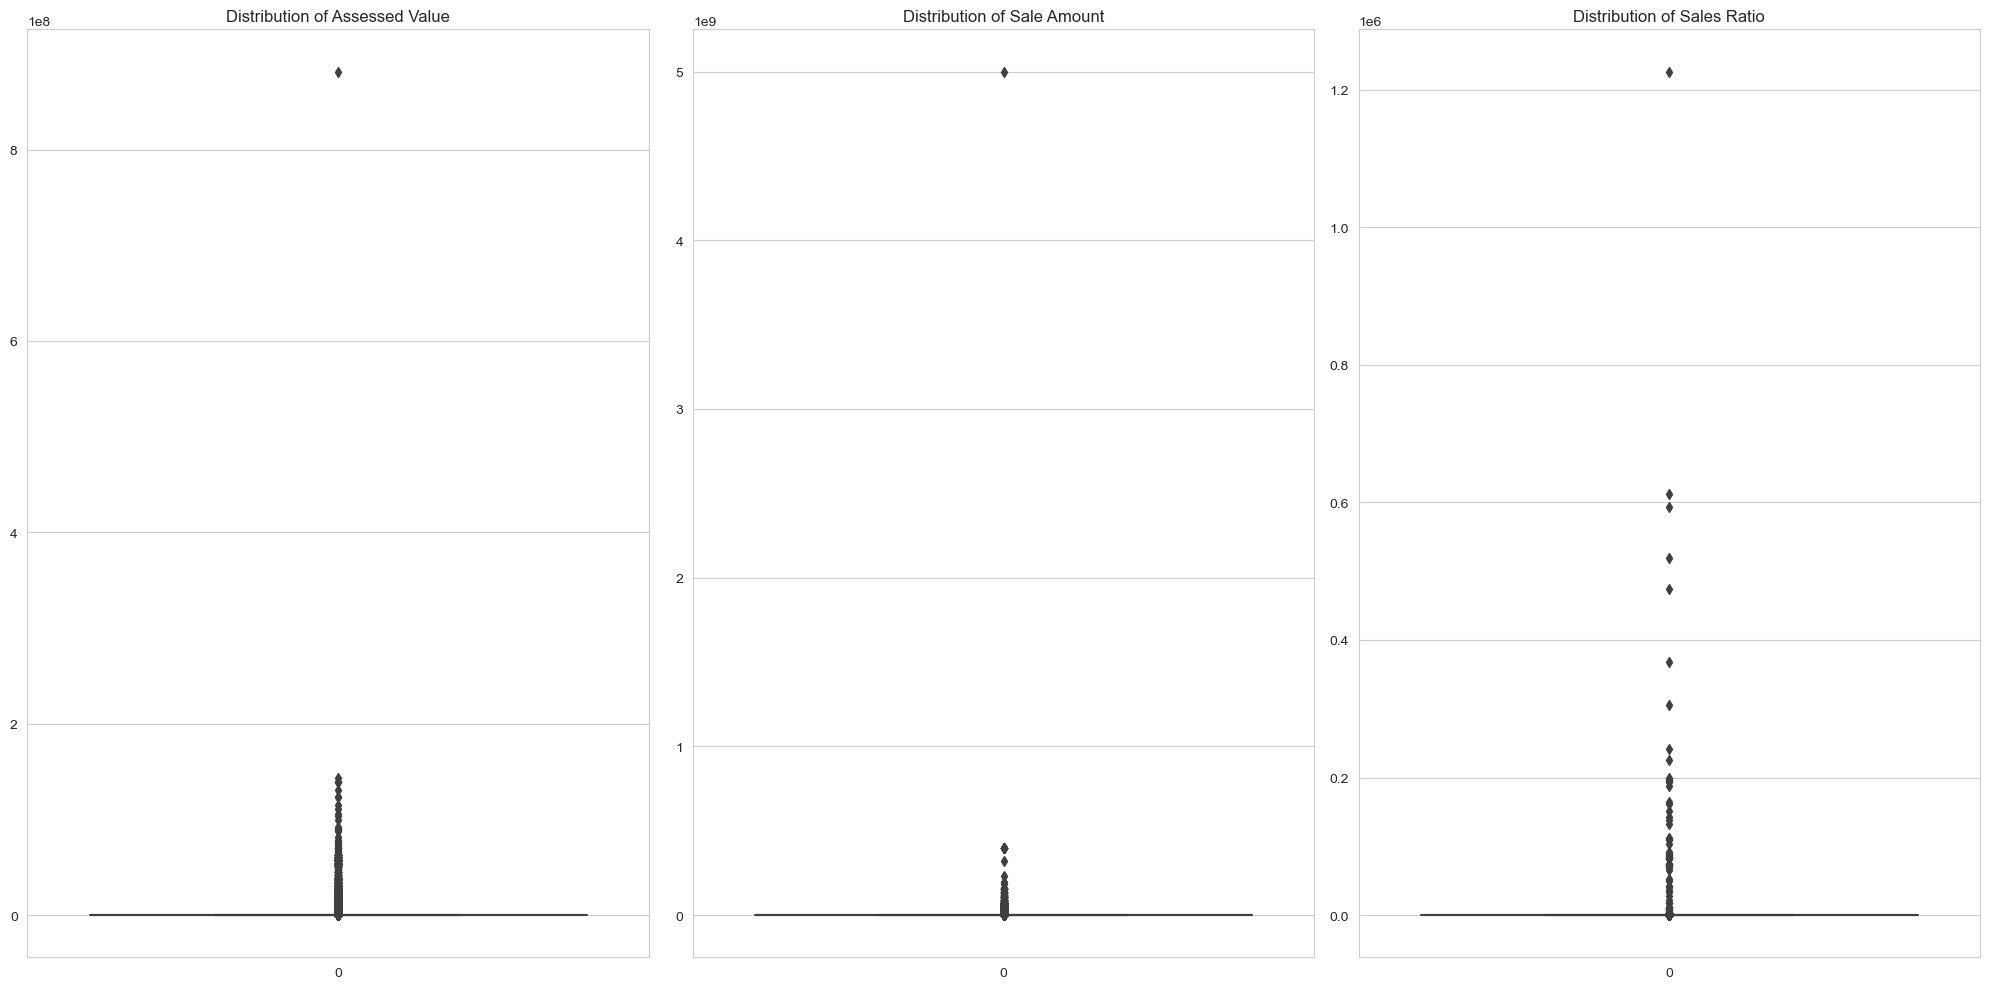

In [34]:
# Set style for all graphs
sns.set_style("whitegrid")

# Create a grid of subplots
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# Plot distributions of Assessed & sale values and sales ratio
for ax, column in zip(axs, ['Assessed Value', 'Sale Amount', 'Sales Ratio']):

    data = df2[column]
    
    # Create the boxplot
    sns.boxplot(data=data, ax=ax)
    
    # Set the title
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [35]:
Q1AV = df2['Assessed Value'].quantile(0.25)
Q2AV = df2['Assessed Value'].quantile(0.50)
Q3AV = df2['Assessed Value'].quantile(0.75)
IQRAV = Q3AV - Q1AV
upperAV = Q3AV + (1.5 * IQRAV)
lowerAV = Q1AV - (1.5 * IQRAV)
print('Outliers count for Assessed Value is : ', 
      ( (df2['Assessed Value'] < (Q1AV - 1.5 * IQRAV)).sum()) 
      + (df2['Assessed Value'] > (Q3AV + 1.5*IQRAV)).sum())

Outliers count for Assessed Value is :  90623


In [36]:
df2=df2[(df2['Assessed Value'] > (Q1AV - 1.5 * IQRAV)) & (df2['Assessed Value'] < (Q3AV + 1.5 * IQRAV))]
df2.shape

(906583, 15)

In [37]:
Q1SA = df2['Sale Amount'].quantile(0.25)
Q2SA = df2['Sale Amount'].quantile(0.50)
Q3SA = df2['Sale Amount'].quantile(0.75)
IQRSA = Q3SA - Q1SA
print('Outliers count for Sale Amount is : ', 
      ( (df2['Sale Amount'] < (Q1SA - 1.5 * IQRSA)).sum()) 
      + (df2['Sale Amount'] > (Q3SA + 1.5*IQRSA)).sum())

Outliers count for Sale Amount is :  35124


In [38]:
df2=df2[(df2['Sale Amount'] > (Q1SA - 1.5 * IQRSA)) & (df2['Sale Amount'] < (Q3SA + 1.5 * IQRSA))]
df2.shape

(871459, 15)

In [39]:
Q1SR = df2['Sales Ratio'].quantile(0.25)
Q2SR = df2['Sales Ratio'].quantile(0.50)
Q3SR = df2['Sales Ratio'].quantile(0.75)
IQRSR = Q3SR - Q1SR
print('Outliers count for Sales Ratio is : ', 
      ( (df2['Sales Ratio'] < (Q1SR - 1.5 * IQRSR)).sum()) 
      + (df2['Sales Ratio'] > (Q3SR + 1.5*IQRSR)).sum())

Outliers count for Sales Ratio is :  86291


In [40]:
df2=df2[(df2['Sales Ratio'] > (Q1SR - 1.5 * IQRSR)) & (df2['Sales Ratio'] < (Q3SR + 1.5 * IQRSR))]
df2.shape

(785168, 15)

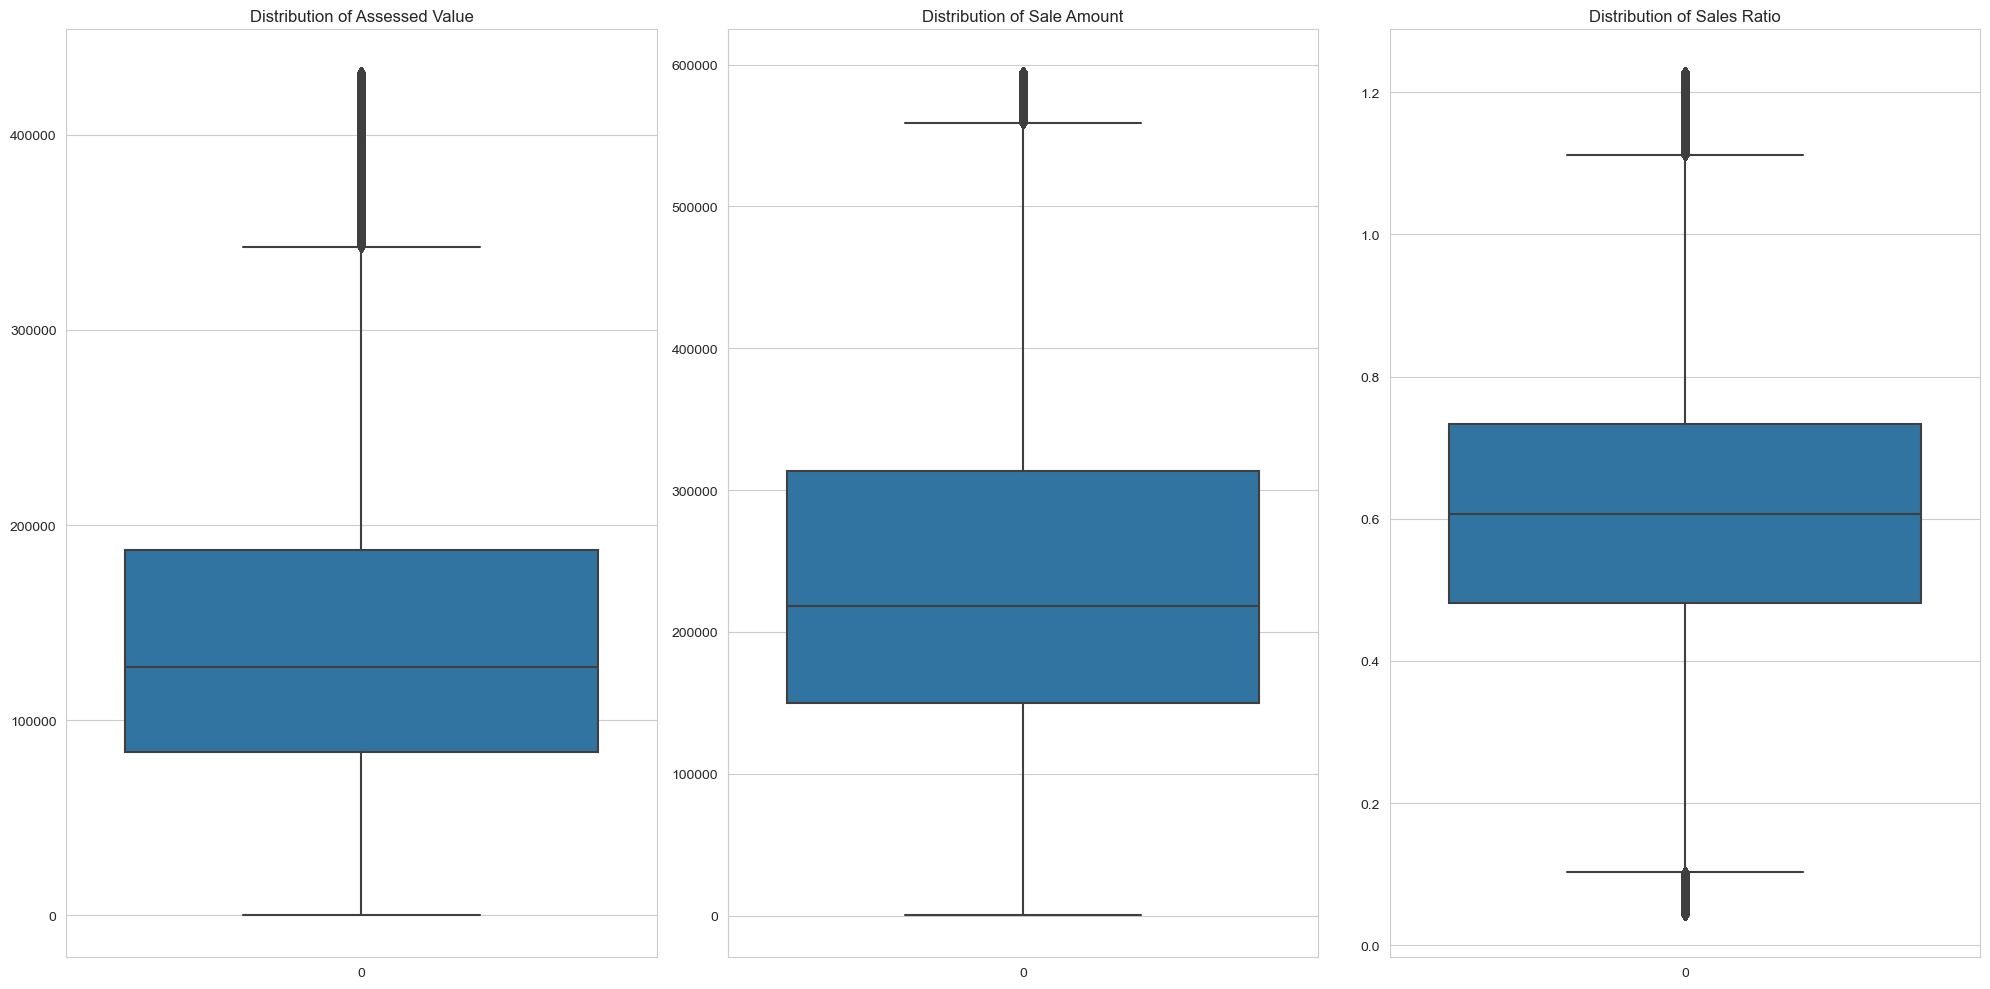

In [41]:
# Set style for all graphs
sns.set_style("whitegrid")

# Create a grid of subplots
fig, axs = plt.subplots(ncols=3, figsize=(20, 10))

# Plot distributions of Assessed & sale values and sales ratio
for ax, column in zip(axs, ['Assessed Value', 'Sale Amount', 'Sales Ratio']):

    data = df2[column].dropna()
    
    # Create the boxplot
    sns.boxplot(data=data, ax=ax)
    
    # Set the title
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [45]:
df2.to_csv('Real_estate_No_outliers.csv')

   ## USA REAL ESTATE SALES 2001 - 2020 DATASET VISUALIZATION

There are not much information within the dataset to visualize

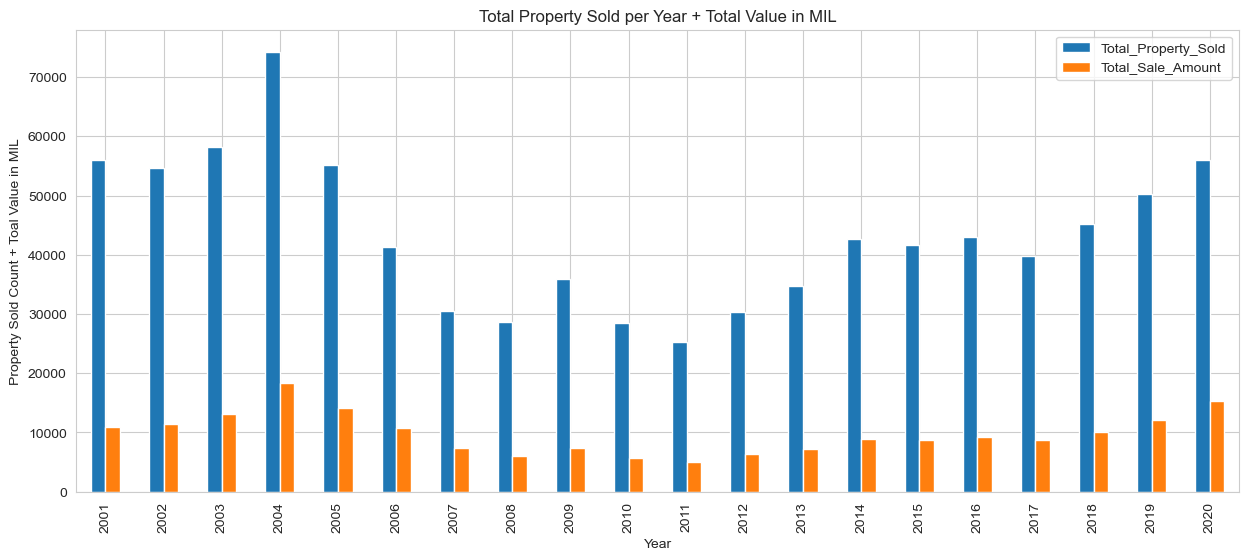

In [42]:
# Here i will visualize total property sold and total sale amount in MIL for each year.

# Creating a new dataset with Years as index, and total property sold for every year.
yearsActivity=df['List Year'].value_counts().reset_index().sort_values('index')

# Renaming columns 
yearsActivity.rename(columns={'index':'Year', 'List Year':'Total_Property_Sold'}, inplace=True)

# assigning Years as index
yearsActivity.set_index('Year', inplace=True)

# Creating a column for total sale amount for each year in MIL
# I converted to MIL so that both columns can be seen in the chart
yearsActivity['Total_Sale_Amount'] = df.groupby('List Year')['Sale Amount'].sum()/1000000

# Plotting the results as a column chart.
yearsActivity.plot(kind='bar', figsize=(15, 6))
plt.title('Total Property Sold per Year + Total Value in MIL')
plt.xlabel('Year')
plt.ylabel('Property Sold Count + Toal Value in MIL')
plt.show()

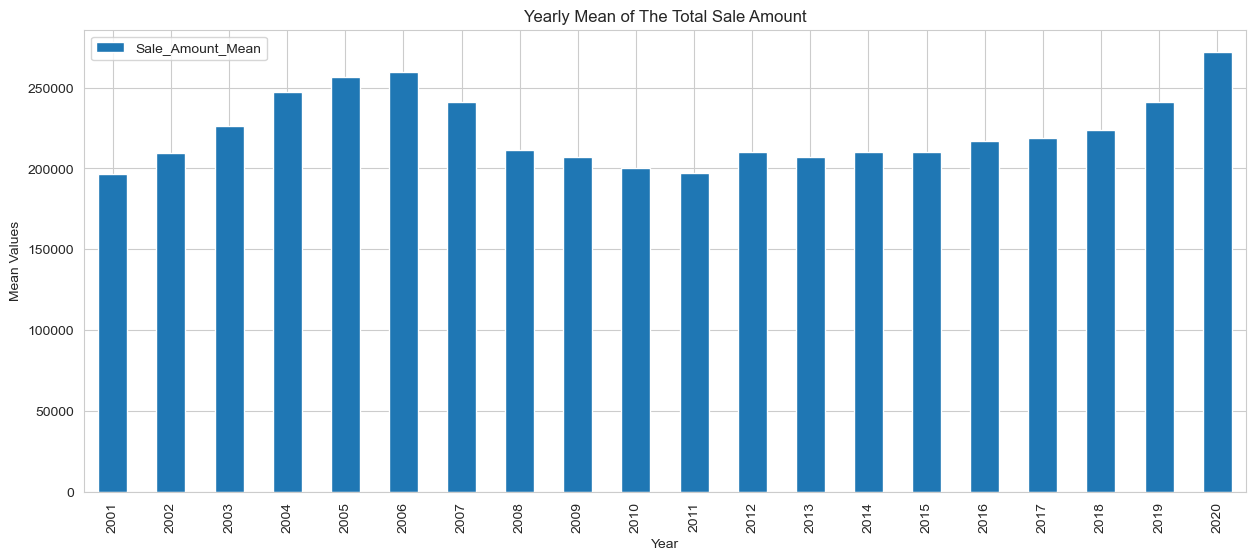

In [66]:
# Chart 2 will be the mean of the sale amounts for each year.

# Creating a new column for the yearly sale amounts mean.
yearsActivity['Sale_Amount_Mean']=df.groupby('List Year')['Sale Amount'].mean()

# Plotting the new column
# Name the Y axes in the .plot command or it will plot all columns of yearsActivity.
yearsActivity.plot(kind='bar', figsize=(15,6), y='Sale_Amount_Mean')
plt.title('Yearly Mean of The Total Sale Amount')
plt.ylabel('Mean Values')
plt.show()